In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples
Let's walk through these two functions together

In [20]:
def difference_of_means(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [21]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(
        shuffled_table, numeric_label, 'Shuffled Label')

(back to slides)
# Randomized Control Trial
Let's look at the example from the textbook the discusses whether
botulinum toxin A causes pain relief

The data is stored in a csv file named `bta.csv`.
How can we load in the data?

In [4]:
bta = Table().read_table('bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


**QUESTION:** What do the columns and values represent?

What table function can we use to help us figure this out? 

*Hint: what function shows us the statistics about the values a column has?*

<details>
<summary>Solution</summary>
  botox.pivot('Result', 'Group')
</details>

In [6]:
bta.pivot("Result", "Group")

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Group,0.0,1.0
Control,14,2
Treatment,6,9


**QUESTION:** What statistic should we use here to see a difference between the groups?

<details>
<summary>Review</summary>
  ![title](hypothesis_testing_stat_review.png)
</details>


![](hypothesis_testing_stat_review.png)

<details>
<summary>Solution</summary>
  difference of means
</details>

**QUESTION:** How do we compute that difference?

<details>
<summary>Solution</summary>
  botox.group('Group', np.average)
    
  tmp_tbl = botox.group('Group', np.average)
    tmp_tbl.column(1).item(1) - tmp_tbl.column(1).item(0)
</details>


In [14]:
bta_means_tbl = bta.group("Group", np.average)
bta_means_tbl

Group,Result average
Control,0.125
Treatment,0.6


In [18]:
observed_stat = bta_means_tbl.column(1).item(1) - bta_means_tbl.column(1).item(0)
observed_stat

0.475

##  Testing the Hypothesis

In [23]:
difference_of_means(bta, "Result", "Group")

0.475

**Question:** How can we use the functions from the top?
<details>
<summary>Solution</summary>
  difference of means(botox, 'Result', 'Group')
</details>  

In [24]:
observed_diff = difference_of_means(bta, "Result", "Group")
observed_diff

0.475

**Question:** How can we simulate this statistic once?
<details>
<summary>Solution</summary>
  one_simulated_difference(botox, 'Result', 'Group')
</details> 


In [33]:
bta.with_column("Shuffled Labels", bta.column('Group'))
#bta.sample(with_replacement=False).column

Group,Result,Shuffled Labels
Control,1,Control
Control,1,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control


In [53]:
#shuffled_groups = Table().with_column("Shuffled Labels", bta.column('Group')).sample(with_replacement=False).column('Shuffled Labels')
bta_with_shuffled = bta.with_column("Shuffled Labels", bta.sample(with_replacement = False).column('Group'))
bta_with_shuffled

Group,Result,Shuffled Labels
Control,1,Control
Control,1,Treatment
Control,0,Control
Control,0,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Treatment
Control,0,Control
Control,0,Control
Control,0,Treatment


In [70]:
bta_with_shuffled = bta.with_column("Shuffled Labels", bta.sample(with_replacement = False).column('Group'))
difference_of_means(bta_with_shuffled, "Result", "Shuffled Labels")

0.08750000000000002

In [64]:
observed_stat

0.475

Now let's simulate that 10k times

In [99]:
# answer is below
all_simulated_stats = make_array()
for i in np.arange(1e4):
    bta_with_shuffled = bta.with_column("Shuffled Labels", bta.sample(with_replacement = False).column('Group'))
    simulated_stat = difference_of_means(bta_with_shuffled, "Result", "Shuffled Labels")
    all_simulated_stats = np.append(all_simulated_stats, simulated_stat)

len(all_simulated_stats) == 1e4

True

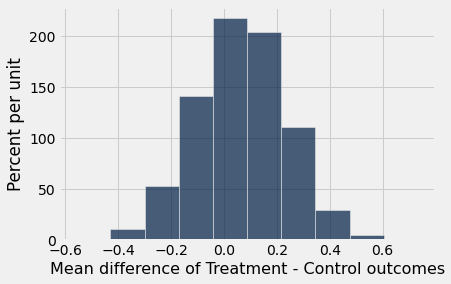

In [100]:
Table().with_column('Mean difference of Treatment - Control outcomes', all_simulated_stats).hist() #bins=np.arange(-0.6, 0.6, 0.01))

In [85]:
observed_stat

0.475

In [101]:
p_value = sum(all_simulated_stats>=observed_stat)/1e4
p_value 

# p_value of first change is 0.0069

0.0071

In [104]:
sum(all_simulated_stats >= observed_stat)

71

In [103]:
sum(make_array(True, True, False))

2

In [105]:
np.count_nonzero( all_simulated_stats >= observed_stat )

71

In [80]:
for i in np.arange(1, 5, .5):
    print(i)

1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


In [82]:
np.arange(1, 5, .5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [ ]:
# answer is below
all_simulated_stats =
for i in np.arange(int(1e4)):
    bta_with_shuffled = bta.with_column("Shuffled Labels", bta.sample(with_replacement = False).column('Group'))
    simulated_stat = difference_of_means(bta_with_shuffled, "Result", "Shuffled Labels")
    all_simulated_stats = np.append(all_simulated_stats, simulated_stat)























In [ ]:
simulated_diffs = make_array()


for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)


In [ ]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)

**Question:** Where is the observed statistic?

Which of the following is our p-value?

In [ ]:
# p-value1
p_1 = sum(simulated_diffs >= observed_diff)/len(simulated_diffs)

# p-value2
p_2 = sum(simulated_diffs <= observed_diff)/len(simulated_diffs)

p_1, p_2

**Question:** Is this statistically significant?

(back to slides)
# Percentiles

In [ ]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [ ]:
# Step 1. Sort the data
np.sort(x)

In [ ]:
# Step 2. Figure out where 55th percentile would be.
# The Xth percentile is first value on the sorted list that is at least as large as X% of the elements 

In [ ]:
# OR: 1 Line of Code using percentile()
percentile(55, x)

(back to slides)
## Percentiles questions

In [ ]:
s= [1, 7, 3, 9, 5]

In [ ]:
#1 
percentile(10, s) == 0

In [ ]:
# 2 
percentile(39, s) == percentile(40, s)

In [ ]:
# 3
percentile(40, s) == percentile(41, s) 

In [ ]:
# 4
percentile(50, s) == 5 

# Estimation

### Sample Median

In [ ]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)

**Question:** What is this dataset?

In [ ]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

**Question:** Who is making the most money?

**Question:** Who is making the least money?

In [ ]:
min_salary = 10 * 20 * 52
sf = sf.where('Total Compensation', are.above(min_salary))

**Question:** What is the typical salary? Should we compute the mean or median for this?

In [ ]:
# skip

In [ ]:
# skip

How can we compute the median with what we covered today?
<details>
<summary>Solution</summary>
  percentile(50, sf.column('Total Compensation'))
</details>  

In [ ]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

In [ ]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

### Estimating Salaries
Say we dont have salaries. What would we do to compute the 50% percentile of salaries?

*Zoom poll*

In [ ]:
# skip
#skip










In [ ]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

In [ ]:
estimate_median = percentile(50, our_sample.column('Total Compensation'))
estimate_median

In [ ]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

**Question:** How far off is our estimate from the true median?

In [ ]:
pop_median, estimate_median, abs(pop_median - estimate_median)

## Variability of the Estimate

Let's implement the following function:

<details>
<summary>Solution</summary>
  our_sample = sf.sample(samp_size, with_replacement=False)
  return percentile(50, our_sample.column('Total Compensation'))
</details>


In [ ]:
def generate_sample_median(samp_size):
    """
    Given a sample size
    Returns the median of a random sample of samp_size from the sf table"""
    # Question: sample with or without replacement?

sample_median = generate_sample_median(300)
sample_median

**Question:** What is our error?


<details>
<summary>Solution</summary>
  error = sample_median - pop_median
</details>



In [ ]:
error = ...
error

(back to slides)
# Quantifying Uncertainty

In [ ]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)
sample_medians

In [ ]:
med_bins = np.arange(90000, 125001, 2500)
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

In [ ]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_15_completed.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'Lecture_15_completed.ipynb'